# Build a spam text classifier by using PyTorch 

**Author**: Anna Gutowska

## Introduction
In this tutorial, you will learn how to take control of your inbox to keep your personal information safe. The objective is to build a [text classifier](https://www.ibm.com/think/topics/text-classification) with [PyTorch](https://www.ibm.com/think/topics/pytorch) that identifies and filters out unwanted or unsolicited communications, also known as spam. With high accuracy, your [machine learning (ML)](https://www.ibm.com/think/topics/machine-learning) classifier sifts through your messages and separates the important ones from the junk.

*“CONGRATULATIONS! You’ve won a free prize! Click here to claim it.”*

*“Your account has been compromised. Click here to reset your password."*

How often are you flooded with emails and text messages like these? Did you win a free iPhone or is the suspicious link a way to steal your information? Modern-day email providers do a good job at filtering these emails as spam. However, these scams can reach us in many forms like text messages, phone calls or even paper mail. Let’s take spam detection into our own hands with PyTorch. 

## What is text classification? 
[Text classification](https://www.ibm.com/think/topics/text-classification) is a [machine learning](https://www.ibm.com/think/topics/machine-learning) task that involves assigning predefined labels to text data in order to automatically categorize it into groups. This technique is fundamental to [natural language processing (NLP)](https://www.ibm.com/think/topics/natural-language-processing) applications such as:

* **Spam detection**: Identifying unwanted or unsolicited emails or messages. This application is the one we explore in this tutorial.
* **[Sentiment analysis](https://www.ibm.com/think/topics/sentiment-analysis)**: Determining the emotional tone of a piece of text (for example, positive, negative or neutral).
* **[Topic modeling](https://www.ibm.com/think/topics/topic-modeling)**: Categorizing text into topics or themes (for example, sports, politics or entertainment).
* **Intent detection**:  Identifying the purpose or intention behind a piece of text (for example, booking a flight or making a complaint).

## How it works
The text classification process typically involves the following steps:

1. **Text preprocessing**: Cleaning and normalizing the text data, which might include
    - Tokenization: Splitting text into individual words or tokens.
    - Stopword removal: Removing common words like "the" or "and" with low sementatic significance.
    - Stemming or lemmatization: Reducing words to their base form.

2. **Feature extraction**: Converting the preprocessed text into a numerical representation that can be used by a machine learning algorithm, such as:
    - [Bag-of-words](https://www.ibm.com/think/topics/bag-of-words): Representing text as a vector of word frequencies.
    - Term frequency-inverse document frequency (TF-IDF): Multiplies Term Frequency (TF) measures how often a word appears in a document and Inverse Document Frequency (IDF) measures how rare a word is across all documents in a collection. 
    - [Word embeddings](https://www.ibm.com/think/topics/word-embeddings): Representing words as vectors in a multidimensional space, where the distance and direction between vectors reflect the similarity and relationships among the corresponding words.

3. **Model training**: Training a machine learning model on the labeled text data by using a classification algorithm such as:
    - [Naive Bayes](https://www.ibm.com/think/topics/naive-bayes)
    - [Support vector machines (SVM)](https://www.ibm.com/think/topics/support-vector-machine)
    - [Logistic regression](https://www.ibm.com/think/topics/logistic-regression)
    - [Random forest](https://www.ibm.com/think/topics/random-forest)
    - Deep [neural networks](https://www.ibm.com/think/topics/neural-networks) (for example, [convolutional neural networks (CNN)](https://www.ibm.com/think/topics/convolutional-neural-networks) or [recurrent neural networks (RNN)](https://www.ibm.com/think/topics/recurrent-neural-networks))
    - [Transformers](https://www.ibm.com/think/topics/transformer-model)

4. **Model evaluation**: Evaluating the performance of the trained model on a test dataset by using metrics such as:
    - Accuracy
    - Precision
    - Recall
    - F1-score

    More information on these metrics can be found [here](https://www.ibm.com/think/topics/confusion-matrix).

5. **Model deployment**: Deploying the trained model in a real-world application, such as an [API](https://www.ibm.com/think/topics/api) or a spam filter. Deployment **isn’t** covered in this tutorial as it requires various considerations, such as model serving, application programming interface (API) design, scalability and security. 

## Why PyTorch? 
[PyTorch](https://www.ibm.com/think/topics/pytorch) is a software-based open source deep learning library used to build neural networks, combining the machine learning (ML) library of Torch with a [Python](https://www.ibm.com/think/topics/python-vs-r)-based high-level API. PyTorch has a data type, the tensor, which serves as the fundamental unit of data used for computation. There are also PyTorch functions to operate on tensors incrementally and interactively.<sup>1</sup> However, the primary benefits that have established PyTorch as the top ML framework among academic and research communities are its ability to leverage [GPU](https://www.ibm.com/think/topics/gpu) for accelerated computation, ease of debugging and its ability to handle large datasets easily.<sup>1,2</sup>  Apart from these reasons, PyTorch is well suited for text classification particularly because of the large number of prebuilt functions and modules for common text classification tasks, such as embedding layers, recurrent neural networks (RNNs) and transformers. Paired with PyTorch's dynamic computation graph, it stands out as the clear choice for our use case, providing a blend of flexibility and speed.<sup>3</sup>

## Prerequisites 

To run this tutorial effectively, users need to have [Python downloaded](https://www.python.org/downloads/). This tutorial stably runs with Python 3.13.  


## Steps

### Step 1. Set up your environment
There are several ways in which you can run the code provided in this tutorial. Either use IBM® watsonx.ai® to follow along step-by-step or clone our GitHub repository to run the full Jupyter Notebook. 

#### Option 1: Use watsonx.ai
Follow the following steps to set up an IBM account to use a Jupyter Notebook.

1. You need an [IBM Cloud® account](https://cloud.ibm.com/registration) to create a [watsonx.ai](http://watsonx.ai) project.
2. Create a [watsonx.ai](http://watsonx.ai) [project](https://www.ibm.com/docs/en/watsonx/saas?topic=projects-creating-project) by using your IBM Cloud account.
3. Create a [Jupyter Notebook](https://www.ibm.com/docs/en/watsonx/saas?topic=editor-creating-managing-notebooks).

    This step opens a Jupyter Notebook environment where you can copy the code from this tutorial. Alternatively, you can download this notebook to your local system and upload it to your [watsonx.ai](http://watsonx.ai) project as an asset. 

#### Option 2: Run the tutorial locally
1. Several Python versions can work for this tutorial. At the time of publishing, we recommend [downloading](https://www.python.org/downloads/) Python 3.13, the latest version.
2. In your preferred IDE, clone the GitHub repository by using `https://github.com/IBM/ibmdotcom-tutorials.git` as the HTTPS URL. For detailed steps on how to clone a repository, refer to the [GitHub documentation](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository). 

    This tutorial can be found inside the docs/tutorials/machine-learning directory.

3. Inside a terminal, create a virtual environment to avoid Python dependency issues.

    ```sh
    python3.13 -m venv myvenv
    source myvenv/bin/activate
    ```

4. Then, navigate to this tutorial's directory.

    ```sh
    cd docs/tutorials/machine-learning
    ```

### Step 2. Install and import relevant libraries 
We need a few libraries and modules for this tutorial. Make sure to import the following ones and if they're not installed, a quick pip installation can be performed. The `-q` flag quiets or suppresses the progress bars. 

Some helpful libraries here include `ntlk`, or Natural Language Toolkit, for text processing. This tutorial uses the `nltk` stopwords corpus for data preprocessing. Additionally, the `fastparquet` and `pyarrow` libraries are required to load data from HuggingFace to parquet objects, returning a `DataFrame`.

In [ ]:
!pip install -q torch pandas pyarrow fastparquet scikit-learn nltk huggingface_hub matplotlib

Import the following modules and classes.

In [ ]:
import torch 
import torch.nn as nn
import torch.optim as optim
import nltk
import regex as re
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from torch.utils.data import DataLoader, Dataset
from collections import Counter

### Step 3. Text preprocessing
The `Deysi/spam-detection-dataset` we will be using for training and testing can be found on [HuggingFace](https://huggingface.co/datasets/Deysi/spam-detection-dataset). It consists of prepartitioned data containing `text` and `label` columns. Each message in the `text` column is therefore assigned a label of `not_spam` or `spam`. 

Let’s read the Parquet files by using the file paths of the training dataset and the test set. We can also return the first 10 rows to take a closer look.

In [ ]:
splits = {'train': 'data/train-00000-of-00001-daf190ce720b3dbb.parquet', 'test': 'data/test-00000-of-00001-fa9b3e8ade89a333.parquet'}

df_train = pd.read_parquet("hf://datasets/Deysi/spam-detection-dataset/" + splits["train"])
df_test = pd.read_parquet("hf://datasets/Deysi/spam-detection-dataset/" + splits["test"])

df_train.head(10)

,text,label
0,hey I am looking for Xray baggage datasets can...,not_spam
1,"""Get rich quick! Make millions in just days wi...",spam
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam
4,Trying to see if anyone already has timestamps...,not_spam
5,Bridging the gap between artificial intelligen...,not_spam
6,hi all any good leads on datasets for fuel pri...,not_spam
7,"\n\nHi everyone,\n\nFor my thesis I'm looking...",not_spam
8,I'm looking for a large dataset of n-grams (pr...,not_spam
9,Check out these amazing weight loss pills! The...,spam


Because this tutorial will explore one model and will not require us to choose between rivaling approaches, we do not need a validation partition of the data. However, if you would like to experiment with selecting from different models, you should concatenate the training and testing sets and repartition. A suggested split can be 50-25-25 for training, validation and testing. 

To start the data cleaning process, we first need to create a set of “stopwords.” To do so, we can use the NLTK stopwords corpus. This corpus consists of words such as “a,” “of,” “me,” “you,” “what,” and so on. The purpose of this corpus is to exclude any such words that do not provide significant semantic meaning. By focusing on words with significant meaning, we can reduce the dimensionality of the text data and improve computational efficiency

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

The `clean_data` function is the function enabling the data cleaning process. In it, we convert the text to lowercase, remove non-alphanumeric characters (except spaces), remove "stopwords" as defined by the `stop_words` set and thne, finally, we return the cleaned text as a string. 

In [ ]:
def clean_data(text):
    text = text.lower()
    text  = re.sub(r'[^a-zA-Z0-9\s]', '', text) 
    words = [w for w in text.split() if w not in stop_words]
    return  " ".join(words)

Let’s now apply this function to the `text` column and store the preprocessed text in the `clean_text` column. 

In [ ]:
df_train['clean_text'] = df_train['text'].apply(clean_data)
df_test['clean_text'] = df_test['text'].apply(clean_data)

As a next step to this process, we can map categorical labels to numerical values so that `spam` maps to 1 and `not_spam` maps to 0. These binary labels can then be used as input for an ML model. The resulting labels are stored as float32 values in the label column of the `df_train` and `df_test` dataframes.

In [ ]:
df_train["label"] = df_train["label"].map({"spam": 1, "not_spam": 0}).astype("float32")
df_test["label"] = df_test["label"].map({"spam": 1, "not_spam": 0}).astype("float32")

### Step 4. Tokenization and vocabulary
As part of the next step, we will tokenize the text and create a vocabulary dictionary. This step maps the tokens to indices and is an alternative approach to the prebuilt `vocab` function of the `torch.classes.torchtext.Vocab` class. Just as the `Vocab` class does by default, we can insert some special tokens to the beginning of the vocabulary:

* `<PAD>` (padding token): Used to truncate sequences to a uniform length, ensuring that all input sequences have the same length, which is necessary for batch processing.
* `<UNK>` (unknown token): Used to represent out-of-vocabulary (OOV) words, that is, words that are not in the training dataset, allowing the model to handle unseen words during inference.

In [ ]:
def tokenize(text):
    return text.split()

train_texts = df_train["clean_text"]
all_tokens = [token for text in train_texts for token in tokenize(text)]
vocab = {word: i+2 for i, word in enumerate(Counter(all_tokens))}  # start from 2
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1

### Step 5.  Instantiate the dataset
Next up is the encoder function, which tokenizes the input `text` into individual tokens and converts them into corresponding IDs by using the `vocab` dictionary. If the length of the IDs is less than the specified `max_len` of 50, the function pads the IDs with zeros to reach the maximum length. The function then returns the encoded IDs, truncated to `max_len` if necessary.

In [ ]:
def encode(text, max_len=50):
    tokens = tokenize(text)
    ids = [vocab.get(t, 1) for t in tokens]
    if len(ids) < max_len:
        ids += [0] * (max_len - len(ids))
    else:
        ids = ids[:max_len]
    return ids

It’s time to create the `SpamDataset` class—our custom dataset class. To create a custom dataset class, we must implement three functions inherited from PyTorch's `Dataset` class: `__init__` , `__len__`  and `__getitem__` .<sup>4</sup> This class preprocesses the text data by using the encode function and stores it as tensors, allowing for easy access and retrieval of data samples by using the `__getitem__` method. The labels are also stored as tensors.

In [ ]:
class SpamDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = [torch.tensor(encode(t), dtype=torch.long) for t in texts]
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

This code extracts the text and test data along with their corresponding labels from the training and testing DataFrames and stores them in separate variables. The text data is stored in `train_texts` and `test_texts`, while the labels are stored in `train_labels` and `test_labels` as NumPy arrays. This step is necessary to prepare the data for further processing and modeling.

In [ ]:
train_texts = df_train["clean_text"]
train_labels = df_train["label"].to_numpy(copy=True)

test_texts = df_test["clean_text"]
test_labels = df_test["label"].to_numpy(copy=True)

The next code block creates instances of `SpamDataset` for training and testing, passing in the corresponding text data and labels. It then uses PyTorch's `DataLoader` to wrap an iterable around the datasets.<sup>4</sup> For automatic batching, we can set our `batch_size` to 32.

In [ ]:
train_ds = SpamDataset(train_texts, train_labels)
test_ds = SpamDataset(test_texts, test_labels)

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=32)

### Step 6. Define the model
The `SpamClassifier` class defines a PyTorch neural network model that classifies text as spam or not spam by using an embedding layer, a long short-term memory (LSTM) layer and a linear layer as well as a sigmoid activation function. The model is defined with parameters such as `vocab_size`, `embed_dim` and `hidden_dim`, which can be adjusted to fine-tune the model's performance.

For a detailed view of the default LSTM hyperparameters not shown here, such as `dropout`, `bidirectional` and `num_layers`, refer to the PyTorch [documentation](https://docs.pytorch.org/docs/stable/generated/torch.nn.LSTM.html). 

In [ ]:
class SpamClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, hidden_dim=64):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(input_size=embed_dim, hidden_size=hidden_dim, batch_first=True)
        self.fc = nn.Linear(in_features=hidden_dim, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return self.sigmoid(out).squeeze(1)

The following code block initializes an instance of the `SpamClassifier` model, passing in the `vocab_size` parameter to define the size of the vocabulary that the model will be trained on.

In [ ]:
vocab_size = len(vocab)
model = SpamClassifier(vocab_size)

### Step 7. Training
The following lines define the loss function used to evaluate the model's performance, with binary cross-entropy (BCE) loss being a suitable choice for binary classification problems like spam detection. We can then initialize the Adam optimizer, which is used to update the model's parameters during training, with a learning rate of 0.001. 

The [learning rate](https://www.ibm.com/think/topics/learning-rate) helps ensure that the model learns enough from training to make meaningful adjustments to its parameters while also not overcorrecting. A learning rate of 0.001 is a common default because it provides a good balance between convergence speed and stability.

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

To check whether a CUDA-compatible GPU is available and to set the `device` variable to either "cuda" or "cpu", we can run the following code. After allowing the model to use the GPU for accelerated computations, if possible, we then move the model to the specified device. This step ensures that all subsequent computations and data are processed on the chosen hardware, whether it be the GPU or CPU. Note, a GPU is not required to run this notebook as-is. 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

SpamClassifier(
  (embedding): Embedding(22754, 64, padding_idx=0)
  (lstm): LSTM(64, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

We are now ready to train the mode for 5 epochs, or iterations. The model is set to training mode at the beginning of each epoch using `model.train()`. The training data is then iterated over in batches by using the `train_dl` data loader, with each batch being transferred to the specified device (GPU or CPU) for processing. For each batch, the model clears accumulated gradients, makes predictions about the input and calculates the loss by using the `criterion`. With `loss.backward()`, the model computes the gradients, then updates the model parameters using the `optimizer`, and increments the `train_loss`. The average loss is calculated and printed at the end of each epoch, providing a measure of the model's performance during training.

In [ ]:
epochs = 5
train_losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X, y in train_dl:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss/len(train_dl))
    print(f"Epoch {epoch+1} | Loss: {train_loss/len(train_dl):.4f}")

Epoch 1 | Loss: 0.4563
Epoch 2 | Loss: 0.2659
Epoch 3 | Loss: 0.2312
Epoch 4 | Loss: 0.1316
Epoch 5 | Loss: 0.0936


As you can see, the loss is significantly dropping with each epoch. Let’s plot the loss over the number of epochs as a visualization of these results. 

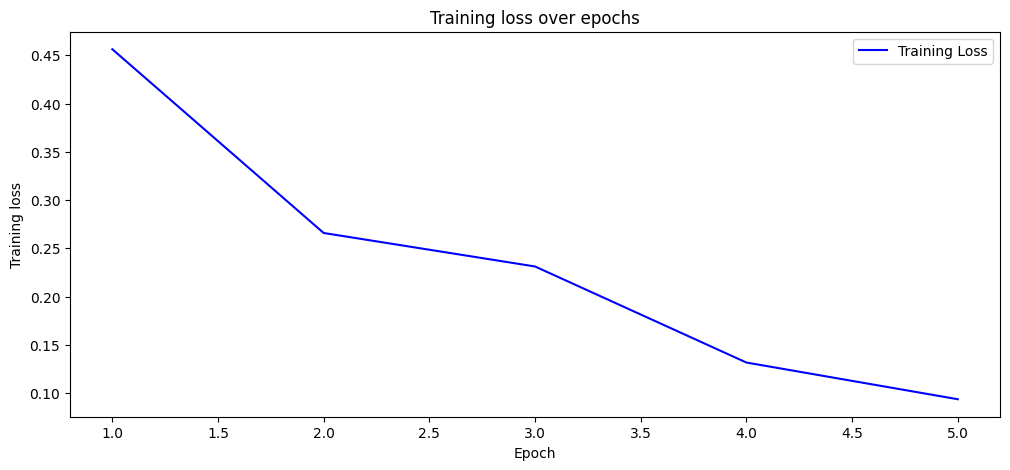

In [ ]:
epochs = np.arange(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
plt.title('Training loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend()
plt.show()

### Step 8. Evaluation
Our final step is evaluation of our trained model. We want to know how well it performs, don’t we? For this step, the model is set to evaluation mode by using `model.eval()` and its performance is evaluated on the test set by using the `test_dl` data loader. Accuracy is calculated by comparing the model's predictions to the actual labels. The accuracy is then printed as a fraction of correct predictions out of the total number of test data samples, providing a measure of the model's performance on unseen data. 


For labeled data that use supervised techniques like ours, accuracy calculation is the simplest evaluation approach. Other approaches include the area under the ROC curve (AUC), receiver operating curve (ROC) and F-score or F-measure.<sup>5</sup>

In [ ]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for X, y in test_dl:
        X, y = X.to(device), y.to(device)
        preds = model(X)
        preds_cls = (preds > 0.5).float()
        correct += (preds_cls == y).sum().item()
        total += y.size(0)

print(f"Final accuracy: {correct / total:.4f}")

Final accuracy: 0.9692


Amazing! With 97.43% accuracy after only 5 epochs of training, our text classification model is performing very well on unseen data. The results obtained are excellent, given that we have trained the model from scratch, without leveraging any pre-trained models. 

Note, your result might slightly differ but should be close to 0.96.

## Conclusion
In this tutorial, we have successfully built and trained a SpamClassifier model by using PyTorch, which can classify text as spam or not spam. We started by preparing the dataset, creating a data loader and defining the model architecture. We then trained the model and evaluated its performance on the test dataset. By following this tutorial, you have gained hands-on experience with building and training a neural network model for text classification tasks. You can now apply this knowledge to build more complex models and tackle real-world problems in NLP.

**Footnotes**:

<sup>1</sup>Antiga, L. P. G., Stevens, E., & Viehmann, T. (2020). *Deep learning with PyTorch*. Simon and Schuster.

<sup>2</sup>B. Tóth, S. A. Laczi and V. Póser. (2024). "Spam Filter Using Artificial Intelligence: PyTorch Framework Based Approach," *2024 IEEE 22nd Jubilee International Symposium on Intelligent Systems and Informatics (SISY)* pp. 000227-000232. DOI: 10.1109/SISY62279.2024.10737559.

<sup>3</sup>PyTorch. “Pytorch/Pytorch.” (2021). *GitHub*. github.com/pytorch/pytorch.

<sup>4</sup>“Datasets & DataLoaders — PyTorch Tutorials 2.7.0+Cu126 Documentation.” (2024). *Pytorch.org*. docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html.

<sup>5</sup>Hossin, M., & Sulaiman, M. N. (2015). A review on evaluation metrics for data classification evaluations. *International journal of data mining & knowledge management process*, 5(2), 1.